<p align="center">
  <img src="./img/ship.png" />
</p>

# Titanic survival prediction (Using machine learning)
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we are building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> Loaded the dataframe to start analyzing the data

## 1. Univariate analysis
For your univariate analysis of the Titanic dataset, we want to explore each variable individually to understand its distribution and to determine what columns might be useful to analyze further

### Columns
To visualize and each column, we need to determine whether each column is a categorical value or a numerical value

In [22]:
# Show all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Categorical values**
- Survived: Can be either 0 (Deceased) or 1 (Survived)
- Pclass: The class of the passenger (1st Upper class, 2nd for Middle class or 3rd for Lower class)
- Sex: Gender of the passenger (male or female)
- Ticket: Number of the ticket (only categorical as it is not a viable numerical value we can calculate with)
- Embarked: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton)

**Numerical values**
- SibSp: The number of siblings/spouses on board for each passenger
- Parch: The number of parents/children on board for each passenger
- Fare: The price of the fare for each passenger
- Cabin: The number of the cabin the passenger is residing in

### Categorical Analysis
Categorical values can be plotted using bar plots, count plots and pie charts. The Ticket values will not be plotted as these are different for each passenger

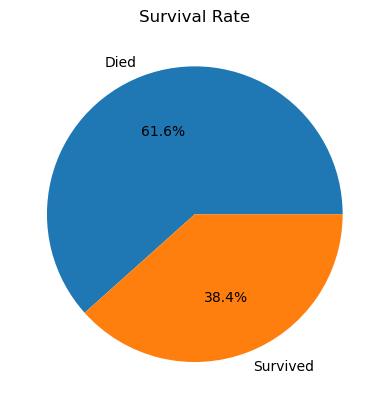

In [23]:
# Plot the count of survivors
plt.pie(df['Survived'].value_counts(), labels=['Died', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Rate')
plt.show()

> Plotting the target **Survival** in a pie chart where 0 is deseased and 1 equals survival of the passenger

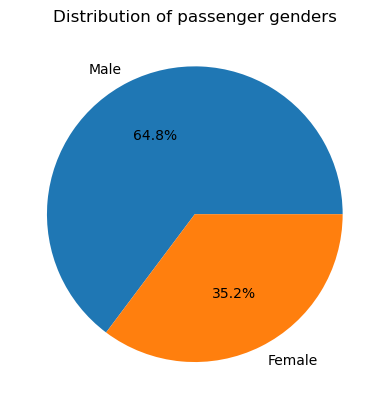

In [24]:
# Plot the class distribution of passengers
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Distribution of passenger genders')
plt.show()

> Plotting the the genders of the passengers on board of the ship in a pie chart (**Sex**)

Text(0.5, 1.0, 'Distribution of passenger classes')

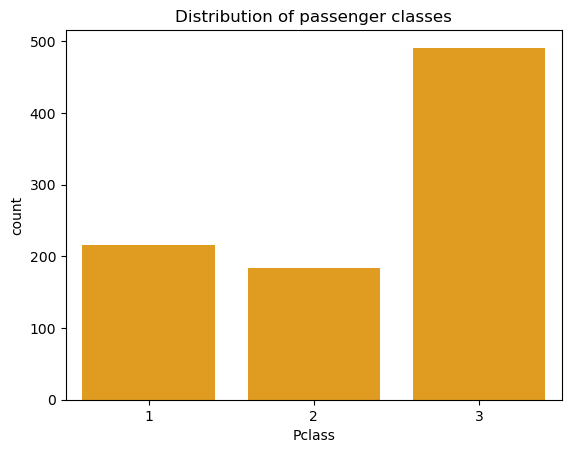

In [25]:
# Plot the class distribution of passengers
class_distribution = sns.countplot(x='Pclass', data=df, color='orange')
class_distribution.set_title('Distribution of passenger classes')

> Plotting the class distribution of the passengers (**Pclass**) where 1 is the most expensive and 3 the least expensive

Text(0.5, 1.0, 'Distribution of passenger embarkation points')

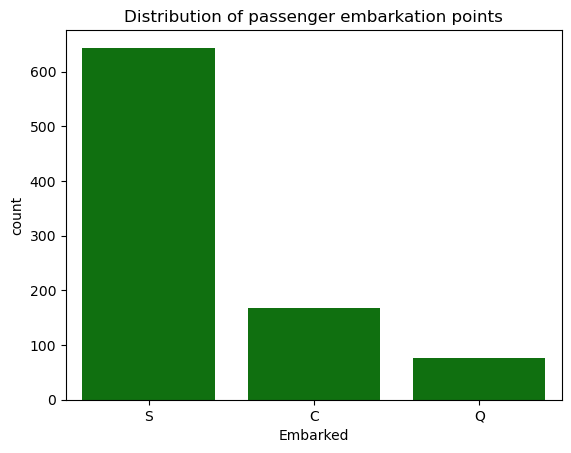

In [26]:
embarked_distribution = sns.countplot(x='Embarked', data=df, color='green')
embarked_distribution.set_title('Distribution of passenger embarkation points')

> Plotting the **Embarked** port distribution on the ship

### Numerical analysis
Numerical values can be plotted using histograms and box plots

Text(0.5, 1.0, 'Fare distribution')

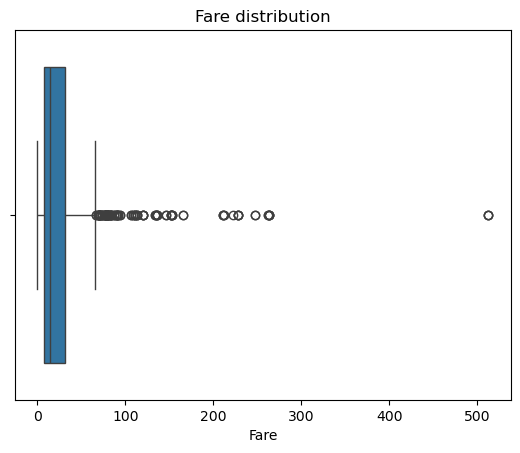

In [27]:
# Show fare with box plot
fare_box_plot = sns.boxplot(x='Fare', data=df)
fare_box_plot.set_title('Fare distribution')

> This box plot shows the distribution of the **Fare** that the passengers have paid for the trip

Text(0.5, 1.0, 'Age distribution')

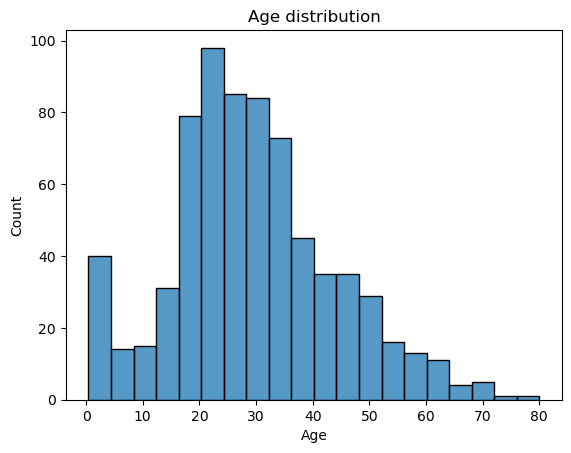

In [28]:
# Show age with histogram
age_hist = sns.histplot(df['Age'])
age_hist.set_title('Age distribution')

> Plotting the **Age** distribution of the passengers on board

Text(0.5, 1.0, 'Number of siblings or spouses distribution')

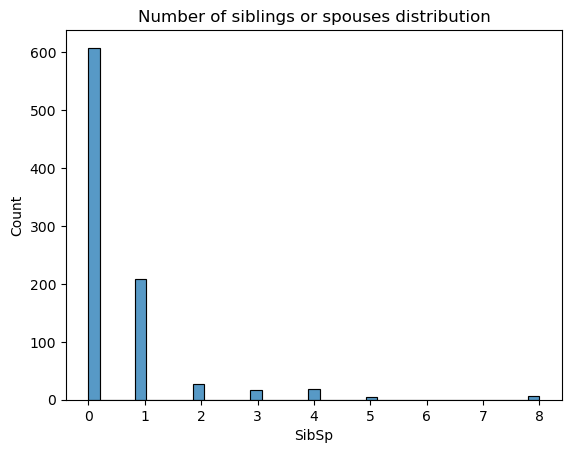

In [29]:
# Show number of siblings or spouses with a histogram
sibsp_hist = sns.histplot(df['SibSp'])
sibsp_hist.set_title('Number of siblings or spouses distribution')

> Plotting the number of spoused and siblings that are on board for a passenger (**SibSp**)

Text(0.5, 1.0, 'Number of parents or children distribution')

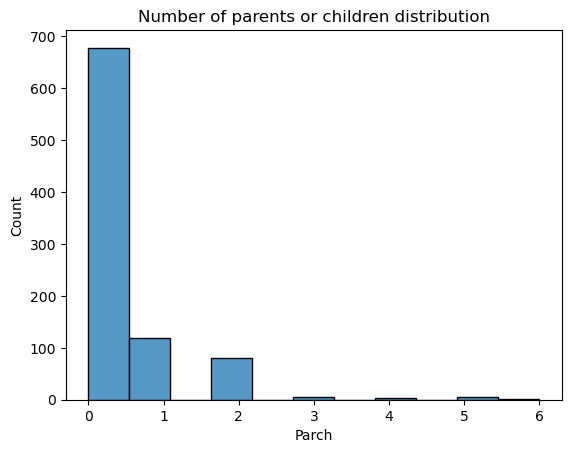

In [30]:
# Show number of parents or children with a histogram
parch_hist = sns.histplot(df['Parch'])
parch_hist.set_title('Number of parents or children distribution')